# Sentiment Analysis of QRIS in Twitter

Sentiment analysis is like a cool way of analyzing text to figure out how people feel and what they think through the use of natural language processing. The whole point is to figure out whether the text is positive, negative, or neutral. This can be very helpful for businesses that want to know how happy their customers are or for experts who want to know how the public feels.

Analyzing tweets about QRIS and Bank Indonesia is important to grasp public sentiment. Knowing if the response is positive, negative, or neutral helps policymakers understand how well QRIS-related policies are received. This insight aids Bank Indonesia in making informed decisions based on public perception.

1. Understanding Public Opinion:
Sentiment analysis helps us figure out what people think about the rules Bank Indonesia has for QRIS. Are they happy, upset, or just okay with them? This helps the people who make these rules know what the public thinks and maybe change things if needed.

2. Checking How People Use QRIS:
We can see how regular folks and businesses use QRIS through tweets. If people are having problems or liking it, we can tell. This helps Bank Indonesia see if QRIS is working well or if it needs fixing.

3. Making Sure People Know About QRIS:
Sentiment analysis can tell us if people know about QRIS and understand it. If not, Bank Indonesia can teach them better and clear up any wrong ideas.

4. Spotting Problems Early:
By looking at tweets, we can find out if there are any big problems or worries about QRIS. If lots of people are upset, it means something might be wrong, and Bank Indonesia can fix it before it becomes a big issue.

5. Helping Bank Indonesia Decide:
Sentiment analysis gives information to help Bank Indonesia make important choices. If people like QRIS, that's good news. If not, it helps figure out what needs to change so everyone is happy with it.

In [82]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Data

Given the privacy policy changes on Twitter, data gathering or scraping has limitations. The available data spans from October 20 to November 14. Analyzing this data provides a snapshot of public sentiment during that period regarding QRIS and Bank Indonesia. 

We're using a powerful tool called BERT to understand what people are saying in comments about QRIS (Quick Response Code Indonesian Standard). BERT is like a language expert that's really good at grasping what words mean in different situations.

Now, there's a version of BERT called "Indo-BERT" that's specifically trained to understand Indonesian text. We're using this to teach the computer to figure out if comments are positive, negative, or neutral.

So, now we have labels on our data.

We take an extra step to make sure our computer is getting things right. After BERT processes the comments and assigns them a sentiment label (positive, negative, or neutral), I manually double-check these labels.

By doing this, we're making sure our analysis is accurate and reliable. 

In [83]:
import pandas as pd
df=pd.read_csv('df_qris.csv')
df=df.drop('Score',axis=1)
df

,Komentar,Sentiment
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral
3,QRIS membuat pembayaran menjadi mudah!,positive
4,Riil QRIS menyederhanakan transaksi.,neutral
...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive
372,gua tetep pake cash gara gara pake qris cepet ...,positive
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral


In [84]:
# Count sentiment occurrences
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

positive    160
negative    130
neutral      84
Name: Sentiment, dtype: int64

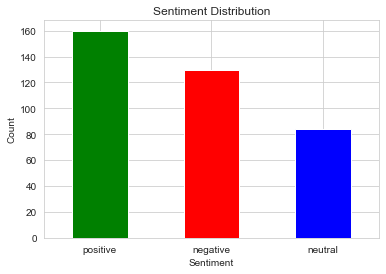

In [85]:
# Create a bar chart to visualize sentiment distribution
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

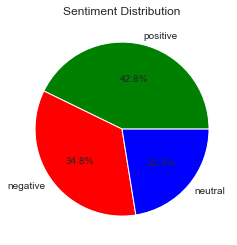

In [86]:
# Create a pie chart to visualize sentiment distribution
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

In [87]:
df[df['Sentiment'] == 'negative']

,Komentar,Sentiment
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative
6,"Penggunaan QRIS seringkali membingungkan, seri...",negative
7,Sistem QRIS terlalu lambat. Saya tidak suka.,negative
8,QRIS tidak dapat diandalkan dan seringkali ber...,negative
11,Saya skeptis tentang keamanan QRIS.,negative
...,...,...
364,gais jangan sampe ada ketipu sama ini orang di...,negative
367,plis aku kebalikannya klo qris qris trs cepet ...,negative
368,tp iya asli ak benci qris jg\n,negative
369,suka lupa bgt ambil uang di ATM alhasil jd lah...,negative


In [88]:
df[df['Sentiment'] == 'positive']

,Komentar,Sentiment
3,QRIS membuat pembayaran menjadi mudah!,positive
5,QRIS ini kaya inovasi luar biasa untuk bisnis ...,positive
10,Adopsi QRIS di Indonesia sungguh mengesankan.,positive
13,Saya memiliki pengalaman luar biasa ketika men...,positive
14,Aplikasi QRIS sangat user-friendly dan efisien.,positive
...,...,...
359,Keamanan QRIS itu sangat penting dalam transak...,positive
365,Kabar gembira nih #SobatRupiah! Bagi Sobat yan...,positive
366,"Menurut ghuwe, metode pembayaran pake QRIS tuh...",positive
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive


In [89]:
df[df['Sentiment'] == 'neutral']

,Komentar,Sentiment
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral
4,Riil QRIS menyederhanakan transaksi.,neutral
9,"Saya netral si tentang qris. Sangat nyaman, te...",neutral
12,QRIS perlu meningkatkan dukungan pelanggan.,neutral
...,...,...
345,Sistem QRIS perlu ditingkatkan lagi biar lebih...,neutral
362,NaN,neutral
363,QRIS sudah bisa digunakan untuk payment di Sin...,neutral
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral


## 2. Preprocessing

Preprocessing is what sentiment analysis is built on. A lot of the time, raw text data from places like social media is messy, noisy, and full of information that doesn’t matter. We need to clean and change this info in order to make sense of it. The accuracy of your sentiment analysis model can be greatly improved by doing the right preprocessing.

### 2.1 Text Cleaning

Text data, especially text from social media, can have parts that don’t have anything to do with the feeling we want to study. For example, hashtags (words or phrases that start with “#”), comments (usernames that start with “@”), and URLs (web links) are all parts that aren’t needed. It will be better to write without these words and sentences.

#### Remove Duplicate Tweets

In [90]:
# See how many duplicate tweets 
df.duplicated().sum()

2

In [91]:
# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

In [92]:
df.dropna(subset=['Komentar'], inplace=True)
df

,Komentar,Sentiment
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral
3,QRIS membuat pembayaran menjadi mudah!,positive
4,Riil QRIS menyederhanakan transaksi.,neutral
...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive
372,gua tetep pake cash gara gara pake qris cepet ...,positive
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral


#### Case Folding

In [93]:
# Define a function to convert text to lowercase
def lowercase(text):
    return text.lower()

df['clean_text'] = df['Komentar'].apply(lowercase)

df

,Komentar,Sentiment,clean_text
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral,penggunaan qris di jakarta tembus 504 juta tra...
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative,huaaa trs ini kenapa ya aku pake qris di dana ...
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral,kalo mau bikin qris gtu gmn sih? trus ada poto...
3,QRIS membuat pembayaran menjadi mudah!,positive,qris membuat pembayaran menjadi mudah!
4,Riil QRIS menyederhanakan transaksi.,neutral,riil qris menyederhanakan transaksi.
...,...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative,daftar qris lama banget gila dari agustus di a...
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive,berhasil kakk. cepet bgt. mending qris drpd de...
372,gua tetep pake cash gara gara pake qris cepet ...,positive,gua tetep pake cash gara gara pake qris cepet ...
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral,"kalo di ibukota, ga punya duit cash aman bisa ..."


#### Remove Emoji



In [94]:
# Define a function to remove emojis using a regex pattern
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['clean_text'] = df['clean_text'].apply(remove_emoji)
df

,Komentar,Sentiment,clean_text
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral,penggunaan qris di jakarta tembus 504 juta tra...
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative,huaaa trs ini kenapa ya aku pake qris di dana ...
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral,kalo mau bikin qris gtu gmn sih? trus ada poto...
3,QRIS membuat pembayaran menjadi mudah!,positive,qris membuat pembayaran menjadi mudah!
4,Riil QRIS menyederhanakan transaksi.,neutral,riil qris menyederhanakan transaksi.
...,...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative,daftar qris lama banget gila dari agustus di a...
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive,berhasil kakk. cepet bgt. mending qris drpd de...
372,gua tetep pake cash gara gara pake qris cepet ...,positive,gua tetep pake cash gara gara pake qris cepet ...
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral,"kalo di ibukota, ga punya duit cash aman bisa ..."


#### Remove URLs

In [95]:
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

df['clean_text'] = df['clean_text'].apply(remove_urls)
df

,Komentar,Sentiment,clean_text
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral,penggunaan qris di jakarta tembus 504 juta tra...
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative,huaaa trs ini kenapa ya aku pake qris di dana ...
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral,kalo mau bikin qris gtu gmn sih? trus ada poto...
3,QRIS membuat pembayaran menjadi mudah!,positive,qris membuat pembayaran menjadi mudah!
4,Riil QRIS menyederhanakan transaksi.,neutral,riil qris menyederhanakan transaksi.
...,...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative,daftar qris lama banget gila dari agustus di a...
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive,berhasil kakk. cepet bgt. mending qris drpd de...
372,gua tetep pake cash gara gara pake qris cepet ...,positive,gua tetep pake cash gara gara pake qris cepet ...
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral,"kalo di ibukota, ga punya duit cash aman bisa ..."


#### Remove Twitter Usernames



In [96]:
def remove_twitter_usernames(text):
    return re.sub("@[A-Za-z0-9_]+", "", text)

df['clean_text'] = df['clean_text'].apply(remove_twitter_usernames)
df

,Komentar,Sentiment,clean_text
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral,penggunaan qris di jakarta tembus 504 juta tra...
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative,huaaa trs ini kenapa ya aku pake qris di dana ...
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral,kalo mau bikin qris gtu gmn sih? trus ada poto...
3,QRIS membuat pembayaran menjadi mudah!,positive,qris membuat pembayaran menjadi mudah!
4,Riil QRIS menyederhanakan transaksi.,neutral,riil qris menyederhanakan transaksi.
...,...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative,daftar qris lama banget gila dari agustus di a...
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive,berhasil kakk. cepet bgt. mending qris drpd de...
372,gua tetep pake cash gara gara pake qris cepet ...,positive,gua tetep pake cash gara gara pake qris cepet ...
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral,"kalo di ibukota, ga punya duit cash aman bisa ..."


####  Remove Punction and Number



In [97]:
def remove_number(text, default_replace=" "):
    text_without_numbers = re.sub(r'\d+', default_replace, text)
    return text_without_numbers
def remove_punctuation(text, default_text=" "):
    list_punct = string.punctuation
    delete_punct = str.maketrans('', '', list_punct)
    new_review = text.translate(delete_punct)
    return new_review
def remove_superscript(text):
    superscript_pattern = re.compile("["u"\U00002070" 
                      u"\U000000B9"  
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"\U0000200D"
                      "]+", flags=re.UNICODE)
    return superscript_pattern.sub(r'', text)
df['clean_text'] = df['clean_text'].apply(remove_number)
df['clean_text'] = df['clean_text'].apply(remove_punctuation)
df['clean_text'] = df['clean_text'].apply(remove_superscript)
df

,Komentar,Sentiment,clean_text
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral,penggunaan qris di jakarta tembus juta trans...
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative,huaaa trs ini kenapa ya aku pake qris di dana ...
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral,kalo mau bikin qris gtu gmn sih trus ada poton...
3,QRIS membuat pembayaran menjadi mudah!,positive,qris membuat pembayaran menjadi mudah
4,Riil QRIS menyederhanakan transaksi.,neutral,riil qris menyederhanakan transaksi
...,...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative,daftar qris lama banget gila dari agustus di a...
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive,berhasil kakk cepet bgt mending qris drpd debi...
372,gua tetep pake cash gara gara pake qris cepet ...,positive,gua tetep pake cash gara gara pake qris cepet ...
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral,kalo di ibukota ga punya duit cash aman bisa p...


#### Remove Hashtags



In [98]:
def remove_hashtags(text):
    return re.sub("#[A-Za-z0-9_]+", "", text)

df['clean_text'] = df['clean_text'].apply(remove_hashtags)
df

,Komentar,Sentiment,clean_text
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral,penggunaan qris di jakarta tembus juta trans...
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative,huaaa trs ini kenapa ya aku pake qris di dana ...
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral,kalo mau bikin qris gtu gmn sih trus ada poton...
3,QRIS membuat pembayaran menjadi mudah!,positive,qris membuat pembayaran menjadi mudah
4,Riil QRIS menyederhanakan transaksi.,neutral,riil qris menyederhanakan transaksi
...,...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative,daftar qris lama banget gila dari agustus di a...
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive,berhasil kakk cepet bgt mending qris drpd debi...
372,gua tetep pake cash gara gara pake qris cepet ...,positive,gua tetep pake cash gara gara pake qris cepet ...
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral,kalo di ibukota ga punya duit cash aman bisa p...


#### Remove Words Repetition



In [99]:
def word_repetition(text):
    review = re.sub(r'(.)\1+', r'\1\1', text)
    return review

def repetition(text):
    repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1', text, flags=re.IGNORECASE)
    return repeat

df['clean_text'] = df['clean_text'].apply(word_repetition)
df['clean_text'] = df['clean_text'].apply(repetition)
df

,Komentar,Sentiment,clean_text
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral,penggunaan qris di jakarta tembus juta transa...
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative,huaa trs ini kenapa ya aku pake qris di dana t...
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral,kalo mau bikin qris gtu gmn sih trus ada poton...
3,QRIS membuat pembayaran menjadi mudah!,positive,qris membuat pembayaran menjadi mudah
4,Riil QRIS menyederhanakan transaksi.,neutral,riil qris menyederhanakan transaksi
...,...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative,daftar qris lama banget gila dari agustus di a...
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive,berhasil kakk cepet bgt mending qris drpd debi...
372,gua tetep pake cash gara gara pake qris cepet ...,positive,gua tetep pake cash gara pake qris cepet bgt k...
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral,kalo di ibukota ga punya duit cash aman bisa p...


#### Remove Whitespaces


In [100]:
def remove_extra_whitespaces(text):
    cleaned_text = re.sub(r'\s+', ' ', text)
    return cleaned_text.strip()  # Optional: Remove leading and trailing spaces

df['clean_text'] = df['clean_text'].apply(remove_extra_whitespaces)
df

,Komentar,Sentiment,clean_text
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral,penggunaan qris di jakarta tembus juta transaksi
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative,huaa trs ini kenapa ya aku pake qris di dana t...
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral,kalo mau bikin qris gtu gmn sih trus ada poton...
3,QRIS membuat pembayaran menjadi mudah!,positive,qris membuat pembayaran menjadi mudah
4,Riil QRIS menyederhanakan transaksi.,neutral,riil qris menyederhanakan transaksi
...,...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative,daftar qris lama banget gila dari agustus di a...
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive,berhasil kakk cepet bgt mending qris drpd debi...
372,gua tetep pake cash gara gara pake qris cepet ...,positive,gua tetep pake cash gara pake qris cepet bgt k...
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral,kalo di ibukota ga punya duit cash aman bisa p...


### change slang into standard terms 

In [101]:
slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['dr ', ' dari'], ['abis ', ' habis'], ['ad ', ' ada'], ['alhmdulillah ', ' alhamdulillah'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['adminnya ', ' admin nya'], ['account ', ' akun'], ['asiikk ', ' asyik'], ['alpukatnya ', ' alpukat nya'], ['amin ', ' aamiin'], ['aplikasinnya ', ' aplikasi nya'], ['aplikasinya ', ' aplikasi nya'], ['awesome ', ' luar biasa'], ['asyilk ', ' asyik'], ['antaran ', ' pengantaran'], ['apus ', ' hapus'], ['ampe ', ' sampai'], ['almt ', ' alamat'], ['almat ', ' alamat'], ['alamt ', ' alamat'], ['almtnya ', ' alamatnya'], ['apknya ', ' aplikasinya'], ['antri ', ' antre'], ['adl ', ' adalah'], ['awalnnya ', ' awalnya'], ['asem ', ' asam'], ['alumunium ', ' aluminium'], ['abis ', ' habis'], ['areaku ', ' area saya'], ['alpulat ', ' alpukat'], ['adlah ', ' adalah'], ['applikasi ', ' aplikasi'], ['apps ', ' aplikasi'], ['app ', ' aplikasi'], ['afordable ', ' affordable'], [

In [102]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [103]:
from textblob import TextBlob
clean_text = []
for review in df['clean_text']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [104]:
df['normalization'] = clean_text

In [105]:
df

,Komentar,Sentiment,clean_text,normalization
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral,penggunaan qris di jakarta tembus juta transaksi,penggunaan qris di jakarta tembus juta transaksi
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative,huaa trs ini kenapa ya aku pake qris di dana t...,huaa terus ini kenapa ya aku pakai qris di dan...
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral,kalo mau bikin qris gtu gmn sih trus ada poton...,kalau mau bikin qris begitu bagaimana sih teru...
3,QRIS membuat pembayaran menjadi mudah!,positive,qris membuat pembayaran menjadi mudah,qris membuat pembayaran menjadi mudah
4,Riil QRIS menyederhanakan transaksi.,neutral,riil qris menyederhanakan transaksi,riil qris menyederhanakan transaksi
...,...,...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative,daftar qris lama banget gila dari agustus di a...,daftar qris lama banget gila dari agustus di a...
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive,berhasil kakk cepet bgt mending qris drpd debi...,berhasil kakk cepat banget mending qris daripa...
372,gua tetep pake cash gara gara pake qris cepet ...,positive,gua tetep pake cash gara pake qris cepet bgt k...,saya tetap pakai tunai gara pakai qris cepat b...
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral,kalo di ibukota ga punya duit cash aman bisa p...,kalau di ibukota tidak punya uang tunai aman b...


### delete words containing 3 letters

After analyzing the cleaned reviews, removing abstract words alone is not sufficient to make the reviews completely clean. I found some words that are inappropriate and confusing. Therefore, I proceeded to remove words consisting of 3 letters, such as 'oh,' 'yes,' 'this,' 'that,' etc., which do not provide crucial information for the model during predictions.

In [106]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

In [107]:
df['final_text'] = df['normalization'].apply(lambda remove: remove_small_words(str(remove)))
df

,Komentar,Sentiment,clean_text,normalization,final_text
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral,penggunaan qris di jakarta tembus juta transaksi,penggunaan qris di jakarta tembus juta transaksi,penggunaan qris jakarta tembus juta transaksi
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative,huaa trs ini kenapa ya aku pake qris di dana t...,huaa terus ini kenapa ya aku pakai qris di dan...,huaa terus kenapa pakai qris dana transaks...
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral,kalo mau bikin qris gtu gmn sih trus ada poton...,kalau mau bikin qris begitu bagaimana sih teru...,kalau bikin qris begitu bagaimana terus pot...
3,QRIS membuat pembayaran menjadi mudah!,positive,qris membuat pembayaran menjadi mudah,qris membuat pembayaran menjadi mudah,qris membuat pembayaran menjadi mudah
4,Riil QRIS menyederhanakan transaksi.,neutral,riil qris menyederhanakan transaksi,riil qris menyederhanakan transaksi,riil qris menyederhanakan transaksi
...,...,...,...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative,daftar qris lama banget gila dari agustus di a...,daftar qris lama banget gila dari agustus di a...,daftar qris lama banget gila dari agustus ok...
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive,berhasil kakk cepet bgt mending qris drpd debi...,berhasil kakk cepat banget mending qris daripa...,berhasil kakk cepat banget mending qris daripa...
372,gua tetep pake cash gara gara pake qris cepet ...,positive,gua tetep pake cash gara pake qris cepet bgt k...,saya tetap pakai tunai gara pakai qris cepat b...,saya tetap pakai tunai gara pakai qris cepat b...
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral,kalo di ibukota ga punya duit cash aman bisa p...,kalau di ibukota tidak punya uang tunai aman b...,kalau ibukota tidak punya uang tunai aman bis...


### 2. Tokenization



Words make up text data, and we need to look at each word separately in order to figure out how people feel about something. Just that is what tokenization does. It takes a phrase and breaks it up into words.

In [108]:
def word_token(text):
  return word_tokenize(text)

df['token'] = df['clean_text'].apply(lambda tokenize:word_token(str(tokenize)))
df

,Komentar,Sentiment,clean_text,normalization,final_text,token
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral,penggunaan qris di jakarta tembus juta transaksi,penggunaan qris di jakarta tembus juta transaksi,penggunaan qris jakarta tembus juta transaksi,"[penggunaan, qris, di, jakarta, tembus, juta, ..."
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative,huaa trs ini kenapa ya aku pake qris di dana t...,huaa terus ini kenapa ya aku pakai qris di dan...,huaa terus kenapa pakai qris dana transaks...,"[huaa, trs, ini, kenapa, ya, aku, pake, qris, ..."
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral,kalo mau bikin qris gtu gmn sih trus ada poton...,kalau mau bikin qris begitu bagaimana sih teru...,kalau bikin qris begitu bagaimana terus pot...,"[kalo, mau, bikin, qris, gtu, gmn, sih, trus, ..."
3,QRIS membuat pembayaran menjadi mudah!,positive,qris membuat pembayaran menjadi mudah,qris membuat pembayaran menjadi mudah,qris membuat pembayaran menjadi mudah,"[qris, membuat, pembayaran, menjadi, mudah]"
4,Riil QRIS menyederhanakan transaksi.,neutral,riil qris menyederhanakan transaksi,riil qris menyederhanakan transaksi,riil qris menyederhanakan transaksi,"[riil, qris, menyederhanakan, transaksi]"
...,...,...,...,...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative,daftar qris lama banget gila dari agustus di a...,daftar qris lama banget gila dari agustus di a...,daftar qris lama banget gila dari agustus ok...,"[daftar, qris, lama, banget, gila, dari, agust..."
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive,berhasil kakk cepet bgt mending qris drpd debi...,berhasil kakk cepat banget mending qris daripa...,berhasil kakk cepat banget mending qris daripa...,"[berhasil, kakk, cepet, bgt, mending, qris, dr..."
372,gua tetep pake cash gara gara pake qris cepet ...,positive,gua tetep pake cash gara pake qris cepet bgt k...,saya tetap pakai tunai gara pakai qris cepat b...,saya tetap pakai tunai gara pakai qris cepat b...,"[gua, tetep, pake, cash, gara, pake, qris, cep..."
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral,kalo di ibukota ga punya duit cash aman bisa p...,kalau di ibukota tidak punya uang tunai aman b...,kalau ibukota tidak punya uang tunai aman bis...,"[kalo, di, ibukota, ga, punya, duit, cash, ama..."


### Wordcloud Vizualitation

In [109]:
review_all = []

for Komentar in df['final_text']:
  text = Komentar.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

penggunaan
qris
jakarta
tembus
juta
transaksi
huaa
terus
kenapa
pakai
qris
dana
transaksi
gagal
terus
kalau
bikin
qris
begitu
bagaimana
terus
potongan
pembayaran
tidak
nntinya
cust
transaksi
qris
membuat
pembayaran
menjadi
mudah
riil
qris
menyederhanakan
transaksi
qris
kayak
inovasi
luar
biasa
untuk
bisnis
indonesia
penggunaan
qris
seringkali
membingungkan
seringkali
tidak
berfungsi
dengan
baik
sistem
qris
terlalu
lambat
saya
tidak
suka
qris
tidak
dapat
diandalkan
seringkali
bermasalah
saya
netral
tentang
qris
sangat
nyaman
tetapi
kurang
dapat
diandalkan
adopsi
qris
indonesia
sungguh
mengesankan
saya
skeptis
tentang
keamanan
qris
qris
perlu
meningkatkan
dukungan
pelanggan
saya
memiliki
pengalaman
luar
biasa
ketika
menggunakan
qris
aplikasi
qris
sangat
userfriendly
efisien
qris
telah
memudahkan
pembayaran
nontunai
insecure
dengan
keamanan
qris
revolusi
qris
semoga
memiliki
lebih
banyak
fitur
opsi
qris
adalah
langkah
yang
positif
seperti
keren
banget
sudah
terlanjur
nyaman
dengan
qris
ka

In [110]:
#finding the "most frequently mentioned words" or "most commonly discussed words" by users.

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire comments:")
freq_dist

how many frequency distribution samples from an entire comments:


FreqDist({'qris': 401, 'pakai': 131, 'tidak': 129, 'saya': 90, 'yang': 85, 'bayar': 76, 'bisa': 72, 'lebih': 70, 'banget': 68, 'tunai': 63, ...})

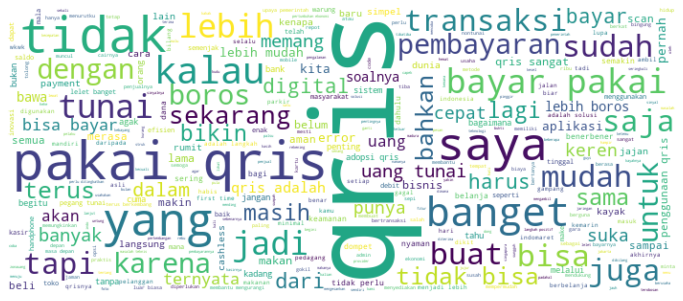

In [111]:
# WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [112]:
# Show most used words

common_review = freq_dist.most_common(100)
print(common_review)

[('qris', 401), ('pakai', 131), ('tidak', 129), ('saya', 90), ('yang', 85), ('bayar', 76), ('bisa', 72), ('lebih', 70), ('banget', 68), ('tunai', 63), ('kalau', 54), ('mudah', 47), ('boros', 43), ('jadi', 40), ('sudah', 35), ('buat', 35), ('tapi', 33), ('juga', 33), ('saja', 32), ('transaksi', 31), ('uang', 31), ('pembayaran', 30), ('dengan', 30), ('untuk', 29), ('karena', 29), ('terus', 27), ('sekarang', 24), ('bahkan', 23), ('sama', 22), ('bikin', 21), ('masih', 21), ('lagi', 21), ('dari', 20), ('digital', 19), ('harus', 19), ('dalam', 18), ('banyak', 17), ('memang', 17), ('suka', 16), ('adalah', 16), ('keren', 16), ('cepat', 16), ('punya', 16), ('sangat', 15), ('ternyata', 15), ('perlu', 14), ('akan', 14), ('soalnya', 13), ('bawa', 13), ('aplikasi', 12), ('kita', 12), ('pernah', 12), ('error', 12), ('penggunaan', 11), ('bisnis', 11), ('makan', 11), ('lama', 11), ('belum', 11), ('aman', 10), ('merasa', 10), ('sampai', 10), ('makin', 10), ('semua', 10), ('scan', 10), ('beli', 10), ('k

In [113]:
# Insert the 500 sample into dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,qris,401
1,pakai,131
2,tidak,129
3,saya,90
4,yang,85
...,...,...
80,bagaimana,8
79,begitu,8
97,dana,7
98,menjadi,7


In [114]:
# sort a sample of words based on their frequency of occurrence in descending order and then select the top 15 most frequent words. 

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]
top15

,words,count
0,qris,401
1,pakai,131
2,tidak,129
3,saya,90
4,yang,85
5,bayar,76
6,bisa,72
7,lebih,70
8,banget,68
9,tunai,63


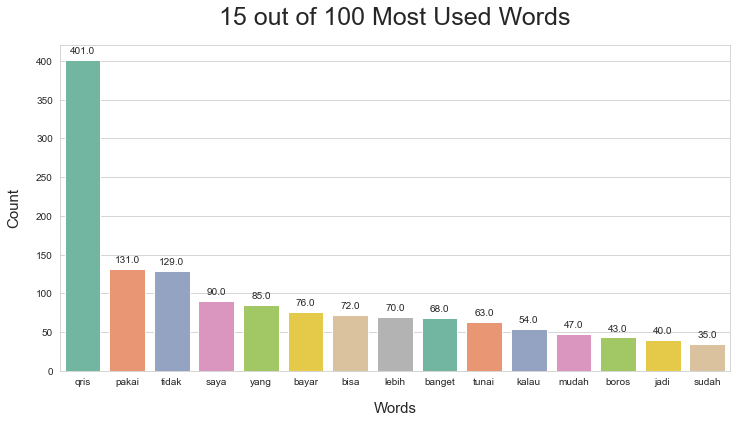

In [115]:
#visualize

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 out of 100 Most Used Words", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

### 3. Remove Stopwords



Stopwords are common words that are frequently filtered out or excluded from text data during text analysis and natural language processing (NLP) tasks. Similar to English, these stopwords are considered to be of little value in understanding the content of the text because they do not carry significant meaning on their own and are primarily used for grammatical structure.

Examples of stopwords in Bahasa Indonesia include words like "dan" (and), "atau" (or), "saya" (I), "kamu" (you), "di" (in, at), "dari" (from), "untuk" (for), and many others.

In [116]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Nab\AppData\R

True

In [117]:
#Showing Indonesian stopword
indonesian_stop = stopwords.words('indonesian')

print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [118]:
# Insert Indonesian stopword to a dataframe

stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [66]:
stopwords_indo.to_excel('stopwords_indonesian.xlsx', index=False)

In [119]:
def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)
  
  return tokenize

df['stop_text'] = df['token'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))

In [120]:
df

,Komentar,Sentiment,clean_text,normalization,final_text,token,stop_text
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral,penggunaan qris di jakarta tembus juta transaksi,penggunaan qris di jakarta tembus juta transaksi,penggunaan qris jakarta tembus juta transaksi,"[penggunaan, qris, di, jakarta, tembus, juta, ...","[penggunaan, qris, jakarta, tembus, juta, tran..."
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative,huaa trs ini kenapa ya aku pake qris di dana t...,huaa terus ini kenapa ya aku pakai qris di dan...,huaa terus kenapa pakai qris dana transaks...,"[huaa, trs, ini, kenapa, ya, aku, pake, qris, ...","[huaa, trs, ya, pake, qris, dana, transaksi, g..."
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral,kalo mau bikin qris gtu gmn sih trus ada poton...,kalau mau bikin qris begitu bagaimana sih teru...,kalau bikin qris begitu bagaimana terus pot...,"[kalo, mau, bikin, qris, gtu, gmn, sih, trus, ...","[kalo, bikin, qris, gtu, gmn, sih, trus, poton..."
3,QRIS membuat pembayaran menjadi mudah!,positive,qris membuat pembayaran menjadi mudah,qris membuat pembayaran menjadi mudah,qris membuat pembayaran menjadi mudah,"[qris, membuat, pembayaran, menjadi, mudah]","[qris, pembayaran, mudah]"
4,Riil QRIS menyederhanakan transaksi.,neutral,riil qris menyederhanakan transaksi,riil qris menyederhanakan transaksi,riil qris menyederhanakan transaksi,"[riil, qris, menyederhanakan, transaksi]","[riil, qris, menyederhanakan, transaksi]"
...,...,...,...,...,...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative,daftar qris lama banget gila dari agustus di a...,daftar qris lama banget gila dari agustus di a...,daftar qris lama banget gila dari agustus ok...,"[daftar, qris, lama, banget, gila, dari, agust...","[daftar, qris, banget, gila, agustus, acc, okt..."
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive,berhasil kakk cepet bgt mending qris drpd debi...,berhasil kakk cepat banget mending qris daripa...,berhasil kakk cepat banget mending qris daripa...,"[berhasil, kakk, cepet, bgt, mending, qris, dr...","[berhasil, kakk, cepet, bgt, mending, qris, dr..."
372,gua tetep pake cash gara gara pake qris cepet ...,positive,gua tetep pake cash gara pake qris cepet bgt k...,saya tetap pakai tunai gara pakai qris cepat b...,saya tetap pakai tunai gara pakai qris cepat b...,"[gua, tetep, pake, cash, gara, pake, qris, cep...","[gua, tetep, pake, cash, gara, pake, qris, cep..."
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral,kalo di ibukota ga punya duit cash aman bisa p...,kalau di ibukota tidak punya uang tunai aman b...,kalau ibukota tidak punya uang tunai aman bis...,"[kalo, di, ibukota, ga, punya, duit, cash, ama...","[kalo, ibukota, ga, duit, cash, aman, pake, qr..."


### 4. Stemming

Stemming is a text normalization technique used to reduce words to their root or base form. The goal of stemming is to simplify words by removing prefixes or suffixes to convert them into a common, basic form. This can help improve the efficiency of text analysis and information retrieval for Bahasa Indonesia.

In [121]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

df['stem_text'] = df['stop_text'].apply(lambda stem:back_to_root(stem))
df

,Komentar,Sentiment,clean_text,normalization,final_text,token,stop_text,stem_text
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,neutral,penggunaan qris di jakarta tembus juta transaksi,penggunaan qris di jakarta tembus juta transaksi,penggunaan qris jakarta tembus juta transaksi,"[penggunaan, qris, di, jakarta, tembus, juta, ...","[penggunaan, qris, jakarta, tembus, juta, tran...",guna qris jakarta tembus juta transaksi
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,negative,huaa trs ini kenapa ya aku pake qris di dana t...,huaa terus ini kenapa ya aku pakai qris di dan...,huaa terus kenapa pakai qris dana transaks...,"[huaa, trs, ini, kenapa, ya, aku, pake, qris, ...","[huaa, trs, ya, pake, qris, dana, transaksi, g...",huaa trs ya pake qris dana transaksi gagal teruss
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,neutral,kalo mau bikin qris gtu gmn sih trus ada poton...,kalau mau bikin qris begitu bagaimana sih teru...,kalau bikin qris begitu bagaimana terus pot...,"[kalo, mau, bikin, qris, gtu, gmn, sih, trus, ...","[kalo, bikin, qris, gtu, gmn, sih, trus, poton...",kalo bikin qris gtu gmn sih trus potong bayar ...
3,QRIS membuat pembayaran menjadi mudah!,positive,qris membuat pembayaran menjadi mudah,qris membuat pembayaran menjadi mudah,qris membuat pembayaran menjadi mudah,"[qris, membuat, pembayaran, menjadi, mudah]","[qris, pembayaran, mudah]",qris bayar mudah
4,Riil QRIS menyederhanakan transaksi.,neutral,riil qris menyederhanakan transaksi,riil qris menyederhanakan transaksi,riil qris menyederhanakan transaksi,"[riil, qris, menyederhanakan, transaksi]","[riil, qris, menyederhanakan, transaksi]",riil qris sederhana transaksi
...,...,...,...,...,...,...,...,...
370,Daftar qris lama banget gila dari agustus di a...,negative,daftar qris lama banget gila dari agustus di a...,daftar qris lama banget gila dari agustus di a...,daftar qris lama banget gila dari agustus ok...,"[daftar, qris, lama, banget, gila, dari, agust...","[daftar, qris, banget, gila, agustus, acc, okt...",daftar qris banget gila agustus acc oktober se...
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,positive,berhasil kakk cepet bgt mending qris drpd debi...,berhasil kakk cepat banget mending qris daripa...,berhasil kakk cepat banget mending qris daripa...,"[berhasil, kakk, cepet, bgt, mending, qris, dr...","[berhasil, kakk, cepet, bgt, mending, qris, dr...",hasil kakk cepet bgt mending qris drpd debit t...
372,gua tetep pake cash gara gara pake qris cepet ...,positive,gua tetep pake cash gara pake qris cepet bgt k...,saya tetap pakai tunai gara pakai qris cepat b...,saya tetap pakai tunai gara pakai qris cepat b...,"[gua, tetep, pake, cash, gara, pake, qris, cep...","[gua, tetep, pake, cash, gara, pake, qris, cep...",gua tetep pake cash gara pake qris cepet bgt k...
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",neutral,kalo di ibukota ga punya duit cash aman bisa p...,kalau di ibukota tidak punya uang tunai aman b...,kalau ibukota tidak punya uang tunai aman bis...,"[kalo, di, ibukota, ga, punya, duit, cash, ama...","[kalo, ibukota, ga, duit, cash, aman, pake, qr...",kalo ibukota ga duit cash aman pake qris debit...


## Data Vizualitation 

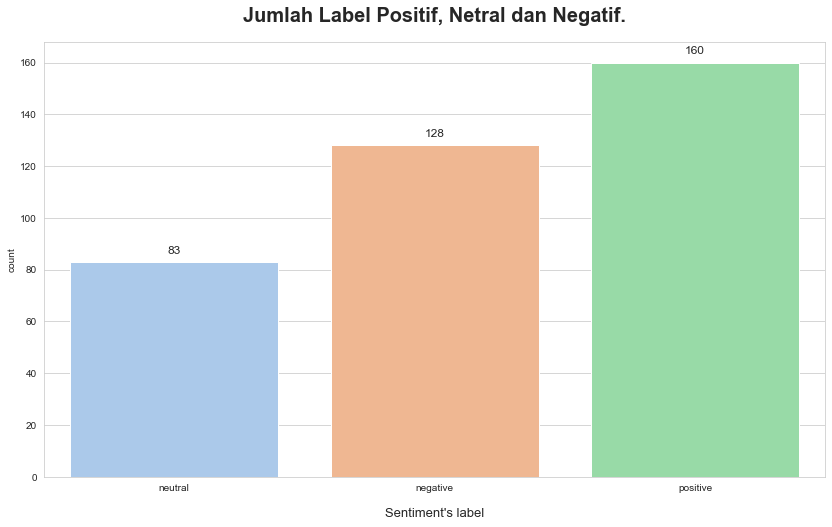

In [123]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen positif dan negatif

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='Sentiment', data=df, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif, Netral dan Negatif.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

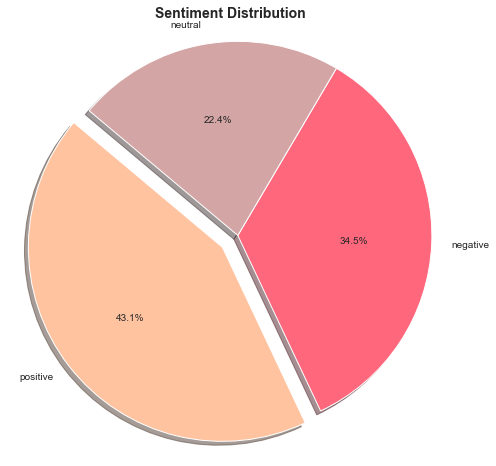

In [131]:
# Define data for the pie chart
# Get the value counts of sentiment labels in your DataFrame
sentiment_counts = df['Sentiment'].value_counts().to_dict()
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['#FFC3A0', '#FF677D', '#D4A5A5']  # You can customize the colors
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Sentiment Distribution", fontsize=14, fontweight='bold')
plt.show()

### Wordcloud for positive sentiment

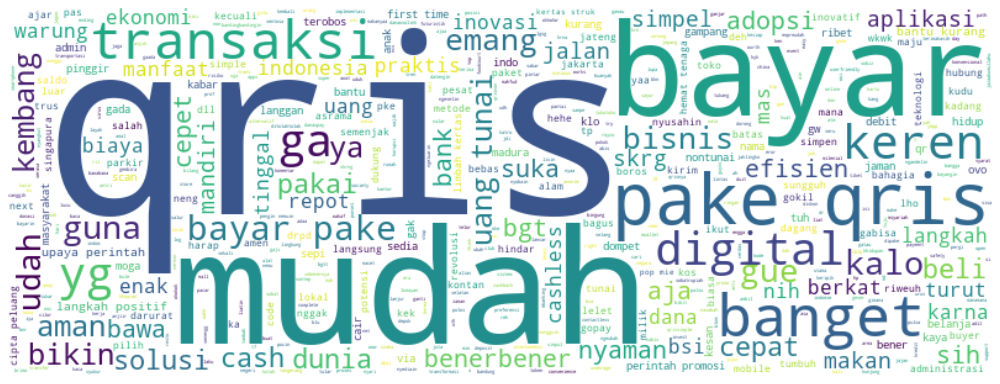

In [126]:
sentiment_pos = ' '.join([review for review in df['stem_text'][df['Sentiment'] == 'positive']])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

### Wordcloud for negative sentiment

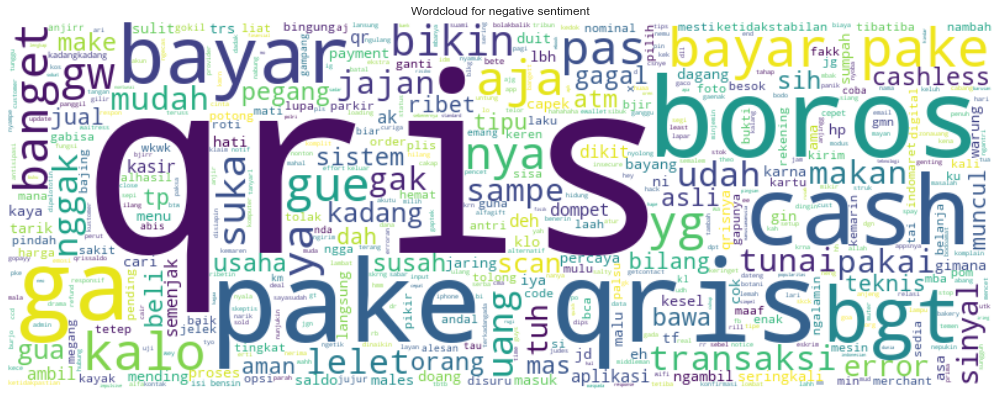

In [133]:
negative_pos = ' '.join([review for review in df['stem_text'][df['Sentiment'] == 'negative']])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(negative_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.title("Wordcloud for negative sentiment")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

### Wordcloud for neutral sentiment

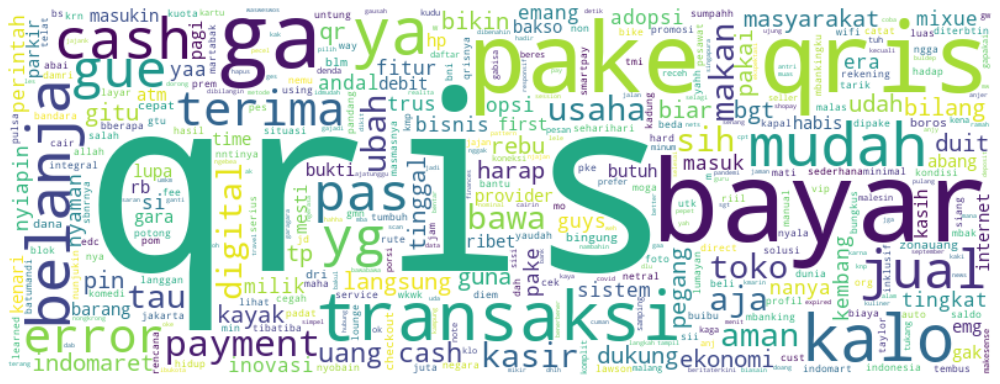

In [129]:
neutral_pos = ' '.join([review for review in df['stem_text'][df['Sentiment'] == 'neutral']])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(neutral_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

# Modeling

In [134]:
# Assuming 'Sentiment' column has values 'positive', 'neutral', 'negative'
# Replace values with integers
df['Sentiment'] = df['Sentiment'].replace({'positive': 1, 'neutral': 0, 'negative': -1}).astype(int)

,Komentar,Sentiment,clean_text,normalization,final_text,token,stop_text,stem_text
0,Penggunaan QRIS di Jakarta Tembus 504 Juta Tra...,0.0,penggunaan qris di jakarta tembus juta transaksi,penggunaan qris di jakarta tembus juta transaksi,penggunaan qris jakarta tembus juta transaksi,"[penggunaan, qris, di, jakarta, tembus, juta, ...","[penggunaan, qris, jakarta, tembus, juta, tran...",guna qris jakarta tembus juta transaksi
1,HUAAA trs ini kenapa ya aku pake qris di dana ...,-1.0,huaa trs ini kenapa ya aku pake qris di dana t...,huaa terus ini kenapa ya aku pakai qris di dan...,huaa terus kenapa pakai qris dana transaks...,"[huaa, trs, ini, kenapa, ya, aku, pake, qris, ...","[huaa, trs, ya, pake, qris, dana, transaksi, g...",huaa trs ya pake qris dana transaksi gagal teruss
2,Kalo mau bikin qris gtu gmn sih? Trus ada poto...,0.0,kalo mau bikin qris gtu gmn sih trus ada poton...,kalau mau bikin qris begitu bagaimana sih teru...,kalau bikin qris begitu bagaimana terus pot...,"[kalo, mau, bikin, qris, gtu, gmn, sih, trus, ...","[kalo, bikin, qris, gtu, gmn, sih, trus, poton...",kalo bikin qris gtu gmn sih trus potong bayar ...
3,QRIS membuat pembayaran menjadi mudah!,1.0,qris membuat pembayaran menjadi mudah,qris membuat pembayaran menjadi mudah,qris membuat pembayaran menjadi mudah,"[qris, membuat, pembayaran, menjadi, mudah]","[qris, pembayaran, mudah]",qris bayar mudah
4,Riil QRIS menyederhanakan transaksi.,0.0,riil qris menyederhanakan transaksi,riil qris menyederhanakan transaksi,riil qris menyederhanakan transaksi,"[riil, qris, menyederhanakan, transaksi]","[riil, qris, menyederhanakan, transaksi]",riil qris sederhana transaksi
...,...,...,...,...,...,...,...,...
370,Daftar qris lama banget gila dari agustus di a...,-1.0,daftar qris lama banget gila dari agustus di a...,daftar qris lama banget gila dari agustus di a...,daftar qris lama banget gila dari agustus ok...,"[daftar, qris, lama, banget, gila, dari, agust...","[daftar, qris, banget, gila, agustus, acc, okt...",daftar qris banget gila agustus acc oktober se...
371,Berhasil kakk. Cepet bgt. Mending qris drpd de...,1.0,berhasil kakk cepet bgt mending qris drpd debi...,berhasil kakk cepat banget mending qris daripa...,berhasil kakk cepat banget mending qris daripa...,"[berhasil, kakk, cepet, bgt, mending, qris, dr...","[berhasil, kakk, cepet, bgt, mending, qris, dr...",hasil kakk cepet bgt mending qris drpd debit t...
372,gua tetep pake cash gara gara pake qris cepet ...,1.0,gua tetep pake cash gara pake qris cepet bgt k...,saya tetap pakai tunai gara pakai qris cepat b...,saya tetap pakai tunai gara pakai qris cepat b...,"[gua, tetep, pake, cash, gara, pake, qris, cep...","[gua, tetep, pake, cash, gara, pake, qris, cep...",gua tetep pake cash gara pake qris cepet bgt k...
373,"Kalo di Ibukota, ga punya duit cash aman bisa ...",0.0,kalo di ibukota ga punya duit cash aman bisa p...,kalau di ibukota tidak punya uang tunai aman b...,kalau ibukota tidak punya uang tunai aman bis...,"[kalo, di, ibukota, ga, punya, duit, cash, ama...","[kalo, ibukota, ga, duit, cash, aman, pake, qr...",kalo ibukota ga duit cash aman pake qris debit...


# Split the text into data train and test

In [137]:
X = df['stem_text']
y = df['Sentiment']

In [138]:
from sklearn.model_selection import train_test_split

In [144]:
# Assuming 'y' is your target variable
y.fillna(0, inplace=True)

test_num = []
random_num = []
acc_num = []
re_num = []
pre_num = []
matrix = []
report = []

for test in np.arange(0.1, 0.4, 0.1):
    for random in np.arange(0, 30, 5):
        print("test size:", test)
        print("random state:", random)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=random)
        vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
        X_train_vect = vectorizer.fit_transform(X_train)
        X_test_vect = vectorizer.transform(X_test)
        SVM = SVC(kernel='linear')
        SVM.fit(X_train_vect, y_train)
        print(SVM.score(X_train_vect, y_train))
        predict = SVM.predict(X_test_vect)
        accuracy = accuracy_score(y_test, predict)
        confusion = confusion_matrix(y_test, predict)
        print('confusion matrix:\n', confusion)
        classification = classification_report(y_test, predict)
        print(classification)
        print("Accuracy Score:", accuracy.round(2))
        recall = recall_score(y_test, predict, average='weighted', zero_division=1)
        print("Recall Score:", recall)
        precision = precision_score(y_test, predict, average='weighted', zero_division=1)
        print("Precision Score:", precision)
        print("\n")

        random_num.append(random)
        matrix.append(confusion)
        report.append(classification)
        acc_num.append(accuracy)
        re_num.append(recall)
        pre_num.append(precision)
        test_num.append(test)
    print("=================================================================")


test size: 0.1
random state: 0
0.9550898203592815
confusion matrix:
 [[12  1  0]
 [ 3  1  3]
 [ 5  0 13]]
              precision    recall  f1-score   support

        -1.0       0.60      0.92      0.73        13
         0.0       0.50      0.14      0.22         7
         1.0       0.81      0.72      0.76        18

    accuracy                           0.68        38
   macro avg       0.64      0.60      0.57        38
weighted avg       0.68      0.68      0.65        38

Accuracy Score: 0.68
Recall Score: 0.6842105263157895
Precision Score: 0.6822368421052631


test size: 0.1
random state: 5
0.9670658682634731
confusion matrix:
 [[14  0  2]
 [ 2  1  6]
 [ 3  2  8]]
              precision    recall  f1-score   support

        -1.0       0.74      0.88      0.80        16
         0.0       0.33      0.11      0.17         9
         1.0       0.50      0.62      0.55        13

    accuracy                           0.61        38
   macro avg       0.52      0.53      0.51

In [145]:
# memasukkan data ke dalam dataframe

data = {'test_size':test_num,
        'random_state':random_num,
        'confusion_matrix': matrix,
        'accuracy': acc_num,
        'recall': re_num,
        'precision': pre_num}
optimal = pd.DataFrame(data)
optimal
# optimal = optimal.sort_values(by=['accuracy','recall','precision'], ascending=True)

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[12, 1, 0], [3, 1, 3], [5, 0, 13]]",0.684211,0.684211,0.682237
1,0.1,5,"[[14, 0, 2], [2, 1, 6], [3, 2, 8]]",0.605263,0.605263,0.560249
2,0.1,10,"[[10, 2, 0], [6, 1, 1], [5, 1, 12]]",0.605263,0.605263,0.640254
3,0.1,15,"[[11, 1, 3], [3, 1, 2], [1, 1, 15]]",0.710526,0.710526,0.677632
4,0.1,20,"[[12, 2, 0], [3, 0, 6], [1, 2, 12]]",0.631579,0.631579,0.539474
5,0.1,25,"[[14, 1, 1], [2, 3, 2], [2, 0, 13]]",0.789474,0.789474,0.786367
6,0.2,0,"[[21, 2, 1], [7, 4, 8], [8, 0, 24]]",0.653333,0.653333,0.665859
7,0.2,5,"[[23, 0, 4], [7, 2, 11], [4, 3, 21]]",0.613333,0.613333,0.567974
8,0.2,10,"[[17, 2, 1], [8, 7, 2], [8, 3, 27]]",0.680000,0.680000,0.725596
9,0.2,15,"[[21, 3, 6], [6, 1, 7], [3, 2, 26]]",0.640000,0.640000,0.586667


In [146]:
# mengatur desimal akurasi, recall, dan precision menjadi 2 angka dibelakang koma

optimal['accuracy'] = optimal['accuracy'].apply(lambda floats:format(float(floats), ".2f"))
optimal['recall'] = optimal['recall'].apply(lambda floats:format(float(floats), ".2f"))
optimal['precision'] = optimal['precision'].apply(lambda floats:format(float(floats), ".2f"))
optimal['test_size'] = optimal['test_size'].apply(lambda floats:format(float(floats), ".1f"))
optimal

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[12, 1, 0], [3, 1, 3], [5, 0, 13]]",0.68,0.68,0.68
1,0.1,5,"[[14, 0, 2], [2, 1, 6], [3, 2, 8]]",0.61,0.61,0.56
2,0.1,10,"[[10, 2, 0], [6, 1, 1], [5, 1, 12]]",0.61,0.61,0.64
3,0.1,15,"[[11, 1, 3], [3, 1, 2], [1, 1, 15]]",0.71,0.71,0.68
4,0.1,20,"[[12, 2, 0], [3, 0, 6], [1, 2, 12]]",0.63,0.63,0.54
5,0.1,25,"[[14, 1, 1], [2, 3, 2], [2, 0, 13]]",0.79,0.79,0.79
6,0.2,0,"[[21, 2, 1], [7, 4, 8], [8, 0, 24]]",0.65,0.65,0.67
7,0.2,5,"[[23, 0, 4], [7, 2, 11], [4, 3, 21]]",0.61,0.61,0.57
8,0.2,10,"[[17, 2, 1], [8, 7, 2], [8, 3, 27]]",0.68,0.68,0.73
9,0.2,15,"[[21, 3, 6], [6, 1, 7], [3, 2, 26]]",0.64,0.64,0.59


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=25)

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [149]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()

In [150]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [151]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_vect, y_train)

SVC(kernel='linear')

In [152]:
predict = svm.predict(X_test_vect)

In [153]:
svm.score(X_train_vect, y_train) # the mean accuracy on the given train data and labels.

0.9640718562874252

In [154]:
svm.score(X_test_vect, y_test) # the mean accuracy on the given train data and labels.

0.7894736842105263

In [155]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predict))

0.4473684210526316


In [156]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[14,  1,  1],
       [ 2,  3,  2],
       [ 2,  0, 13]], dtype=int64)

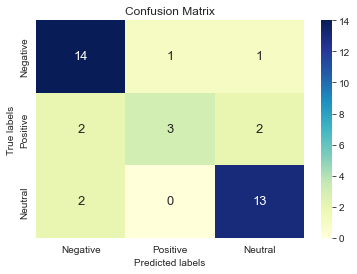

In [157]:
ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive','Neutral'])
ax.yaxis.set_ticklabels(['Negative', 'Positive','Neutral'])
plt.show()

In [160]:
target_names = ['Negative','Neutral','Positive']
print(classification_report(y_test, predict, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.78      0.88      0.82        16
     Neutral       0.75      0.43      0.55         7
    Positive       0.81      0.87      0.84        15

    accuracy                           0.79        38
   macro avg       0.78      0.72      0.74        38
weighted avg       0.79      0.79      0.78        38



In [162]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

akurasi = accuracy_score(y_test, predict)
print("Accuracy model:", round(akurasi, 2))

recall = recall_score(y_test, predict, average='weighted')
print("Recall model:", round(recall, 2))

precision = precision_score(y_test, predict, average='weighted')
print("Precision model:", round(precision, 2))


Accuracy model: 0.79
Recall model: 0.79
Precision model: 0.79
